In [29]:
import numpy as np
import h5py

In [53]:
train_dataset = h5py.File('C:/Users/feroz/Documents/DeepLearning/Assn1/dataset/train_catvnoncat.h5', "r")
test_dataset = h5py.File('C:/Users/feroz/Documents/DeepLearning/Assn1/dataset/test_catvnoncat.h5', "r")

print("Keys: %s" % test_dataset.keys())
print(test_dataset["test_set_x"])
x = np.array(test_dataset["test_set_x"])
print(x.shape)
print(x.size)
y = np.array(test_dataset["list_classes"])
print(y)

Keys: <KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>
<HDF5 dataset "test_set_x": shape (50, 64, 64, 3), type "|u1">
(50, 64, 64, 3)
614400
[b'non-cat' b'cat']


In [54]:
train_set_x_orig = np.array(train_dataset["train_set_x"]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"]) # your train set labels
test_set_x_orig = np.array(test_dataset["test_set_x"]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"]) # your test set labels
print("printing the dimensions of data before reshaping")

print(train_set_x_orig.shape)
print(train_set_y_orig.shape)
print(test_set_x_orig.shape)
print(test_set_y_orig.shape)

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
train_set_y_flatten = train_set_y_orig.reshape(1,-1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
test_set_y_flatten = test_set_y_orig.reshape(1,-1)

print("printing the dimensions of data after reshaping")

print(train_set_x_flatten.shape)
print(train_set_y_flatten.shape)
print(test_set_x_flatten.shape)
print(test_set_y_flatten.shape)

train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255


printing the dimensions of data before reshaping
(209, 64, 64, 3)
(209,)
(50, 64, 64, 3)
(50,)
printing the dimensions of data after reshaping
(12288, 209)
(1, 209)
(12288, 50)
(1, 50)


this image belongs to b'cat' class


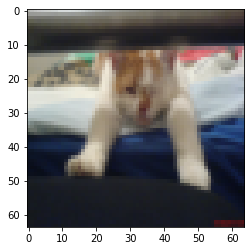

In [55]:
import matplotlib.pyplot as plt
i=29
plt.imshow(train_set_x_orig[i])
print("this image belongs to "+str(y[train_set_y_orig[i,]])+" class")

In [56]:
# defining sigmoid function that will help as activation function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s


In [57]:
def initialize_with_zeros(dim):
    w=np.zeros(shape=(dim,1))
    b=0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return (w,b)

In [58]:
def propagate(w,b,X,Y):
    # forward propagation and compute output and cost
    m = X.shape[1] # determine the number of training items 
    A = sigmoid(np.dot(w.T, X) + b)  # compute output using sigmoid activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A))) 
    # backward propagation, compute dz and da 
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [59]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            print ("Cost after iteration %i: %f" % (i, cost))
    
        params = {"w": w,
                  "b": b}
    
        grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [60]:
def initialise_parameters(layer_dims):
    parameters = {}
    for i in range(layer_dims.shape[1]-1):
        parameters['W'+str(i+1)] = np.random.randn(layer_dims[i+1],layer_dims[i]) * 0.01
        parameters['b'+str(i+1)] = np.zeros(layer_dims[i+1])
    
    parameters['W'+str(layer_dims.shape[1])] = np.random.randn(1,layer_dims[layer_dims.shape[1]]) * 0.01
    parameters['b'+str(layer_dims.shape[1])] = np.zeros(1,1)
    

In [61]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])
    
    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [62]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m),dtype="int")
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [63]:
d = model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


In [98]:
print(d["Y_prediction_train"].shape)
print(train_set_y_flatten.shape)

np.mean(np.abs(d["Y_prediction_train"] - train_set_y_flatten ))*100
np.mean(np.abs(d["Y_prediction_test"] - test_set_y_flatten ))*100



(1, 209)
(1, 209)


30.0

[[1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0
  0 1 0 0 1 0 1 0 1 0 0 1 1 0]]
you predicted that it is a [b'non-cat']" picture.


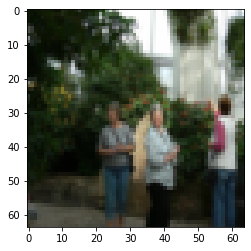

In [89]:
index = 21
num_px=64
print(d["Y_prediction_test"])
plt.imshow(test_set_x_orig[index,:,:,:])
print ("you predicted that it is a " + str(y[d["Y_prediction_test"][:,index]]) +  "\" picture.")